## Import Libraries 

In [15]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load data
df_load = pd.read_csv("cleaned_insurance_data.csv")

# Drop unwanted column
df_load.drop(["Unnamed: 0"], inplace=True, axis=1)

In [17]:
# Re-order column
df_load = df_load[['charges', 'smoker', 'age',  'children', 'bmi', 'sex', 'region']]

## Feature Selection

- With F-statistic

In [18]:
# Duplicate data
model_data = df_load.copy()

In [19]:
# One-Hot Encode "region" column
model_data = pd.get_dummies(model_data, columns=['region']).astype(int)

In [20]:
# Separate feature and target parameters
x_model_features = model_data[['smoker', 'age', 'children', 'bmi', 'sex', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y_target_feature = model_data[['charges']]

In [21]:
# Transform (to normalize distribution as much as possible)
# Scale features (to have feature parameters on the same scale)

from sklearn.preprocessing import StandardScaler 

x_model_features_log = np.log1p(x_model_features)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the input data (X)
x_scaled = scaler.fit_transform(x_model_features_log)

In [22]:
# Transform target 
y_log = np.log1p(y_target_feature)

In [23]:
# Calculate f_statistic 
from sklearn.feature_selection import f_regression

f_statistic, p_values = f_regression(x_scaled,y_log)

/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# Display f_statistic
features = pd.DataFrame({"Parameters": x_model_features.columns,
              "f_statistic": f_statistic,
              "p-value": p_values
              })

# Sort selected features
features.sort_values(by= ['f_statistic', 'p-value'], ascending=False).reset_index(drop=True)

,Parameters,f_statistic,p-value
0,smoker,1062.635650,5.873238e-172
1,age,532.436093,2.055911e-99
2,children,40.030499,3.404970e-10
3,bmi,25.451589,5.161291e-07
4,region_southwest,2.412675,1.205936e-01
5,region_northeast,2.403414,1.213078e-01
6,region_northwest,0.317817,5.730172e-01
7,region_southeast,0.299346,5.843841e-01
8,sex,0.065792,7.976040e-01


## Checking for multicolinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_scaled_df = pd.DataFrame(x_scaled[ : , :4], columns= ["smoker", "age", "children", 'bmi'])

variables =x_scaled_df[['smoker','age','children', 'bmi']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [26]:
vif

,VIF,Features
0,1.000780,smoker
1,1.022843,age
2,1.010447,children
3,1.012105,bmi


## Checking OLS Assumption

In [27]:
ols_data = pd.concat([x_scaled_df, y_log], axis = 1)
ols_data_reorder = ols_data[["charges", "smoker", "age", "children", "bmi"]]

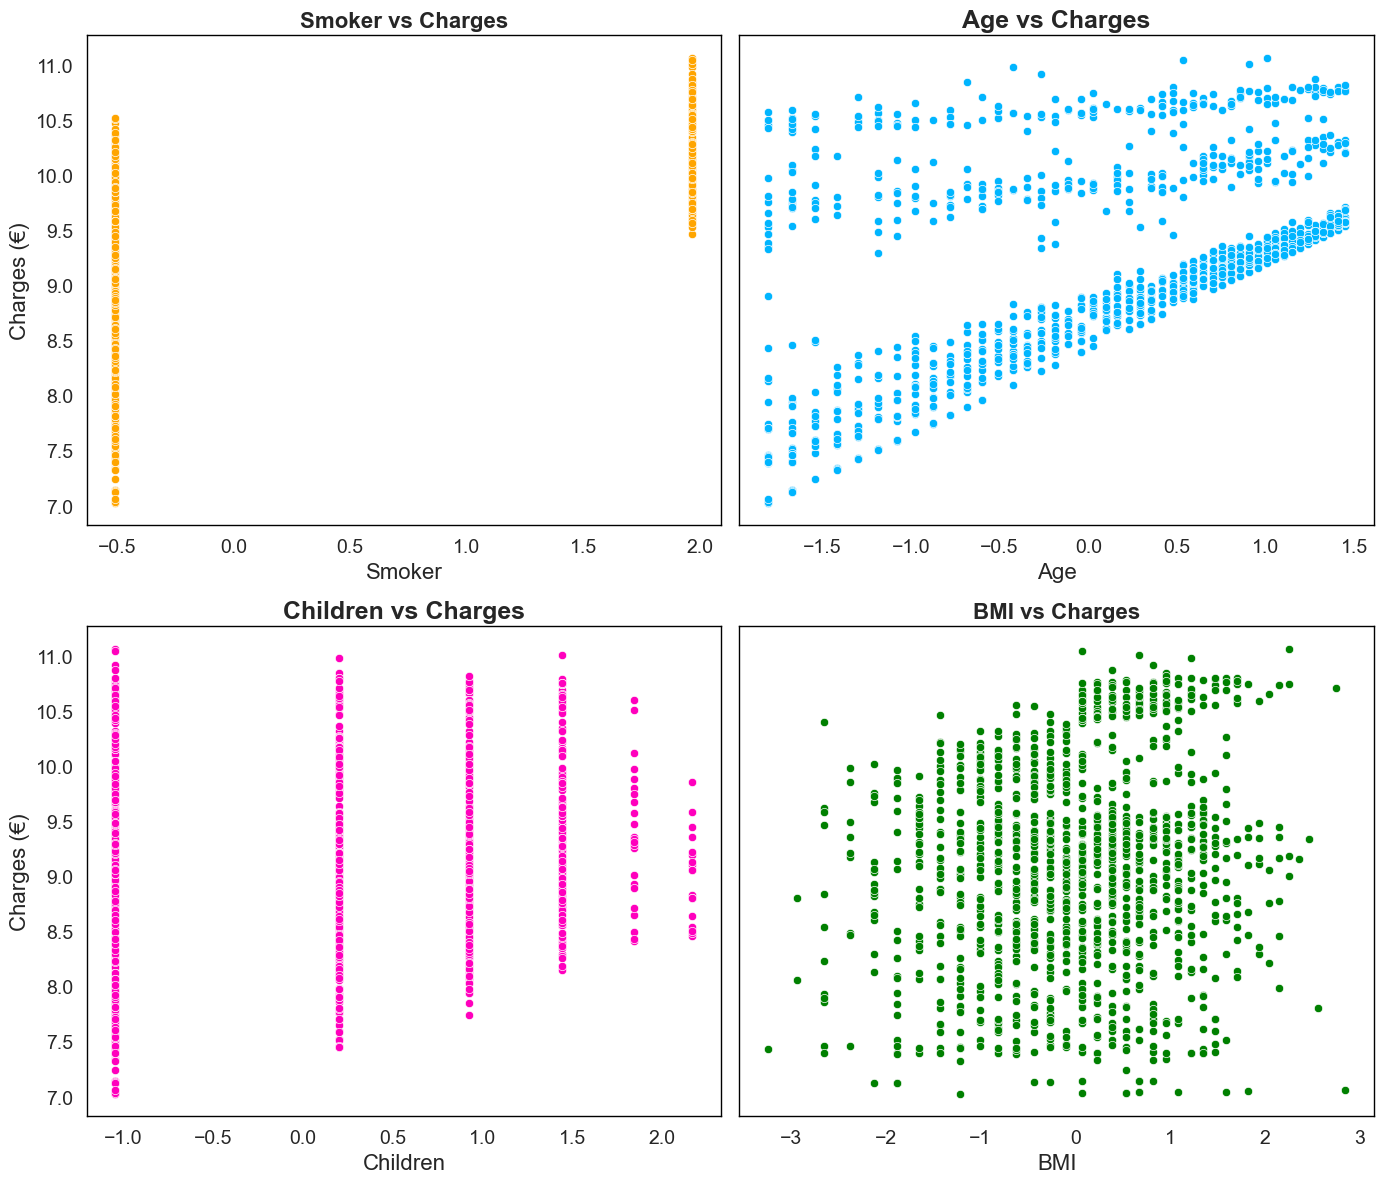

In [ ]:
# Create a figure with 4 subplots in 2 rows
colors = sns.color_palette("hsv", 8)  
sns.set_palette(colors)

fig, axes = plt.subplots(2, 2, figsize = (14, 12), sharey=True) 

# Scatter plot: smoker vs charges
sns.scatterplot(data=ols_data_reorder, x='smoker', y='charges', ax=axes[0, 0], color = colors[0])
axes[0, 0].set_title('Smoker vs Charges', fontsize=16, weight='bold')
axes[0, 0].set_xlabel('Smoker', fontsize=16, weight='normal')
axes[0, 0].set_ylabel('Charges (€)', fontsize=16, weight='normal')
axes[0, 0].tick_params(axis='x', labelsize=14)  # Set x-axis tick label size
axes[0, 0].tick_params(axis='y', labelsize=14)  # Set y-axis tick label size

# Scatter plot: age vs charges
sns.scatterplot(data=ols_data_reorder, x='age', y='charges', ax=axes[0, 1], color =  colors[4])
axes[0, 1].set_title('Age vs Charges', fontsize=18, weight='bold')
axes[0, 1].set_xlabel('Age', fontsize=16, weight='normal')
axes[0, 1].tick_params(axis='x', labelsize=14)  # Set x-axis tick label size
axes[0, 1].tick_params(axis='y', labelsize=14)  # Set y-axis tick label size

# Scatter plot: children vs charges
sns.scatterplot(data=ols_data_reorder, x='children', y='charges', ax=axes[1, 0], color = colors[7])
axes[1, 0].set_title('Children vs Charges', fontsize=18, weight='bold')
axes[1, 0].set_xlabel('Children', fontsize=16, weight='normal')
axes[1, 0].set_ylabel('Charges (€)', fontsize=16, weight='normal')
axes[1, 0].tick_params(axis='x', labelsize=14)  # Set x-axis tick label size
axes[1, 0].tick_params(axis='y', labelsize=14)  # Set y-axis tick label size

# Scatter plot: bmi vs charges
sns.scatterplot(data=ols_data_reorder, x='bmi', y='charges', ax=axes[1, 1], color = 'green')
axes[1, 1].set_title('BMI vs Charges', fontsize=16, weight='bold')
axes[1, 1].set_xlabel('BMI', fontsize=16, weight='normal')
axes[1, 1].tick_params(axis='x', labelsize=14)  # Set x-axis tick label size
axes[1, 1].tick_params(axis='y', labelsize=14)  # Set y-axis tick label size

# Increase border line width
for ax in axes.flat:
    for _, spine in ax.spines.items():
        spine.set_linewidth(1)
        spine.set_color('black') #Set the color to black
        ax.set_facecolor('white') #Set the background color to white

# Adjust layout
plt.tight_layout()

# Plot figure
plt.savefig("Checking OLS assumption.png", dpi = 300,  bbox_inches = 'tight')

plt.show()

## Feature Engineering

In [29]:
df = df_load[['charges', 'smoker', 'age', 'children', 'bmi']]

In [30]:
# Categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'under_weight'
    elif 18.5 <= bmi < 25:
        return 'normal_weight'
    elif 25 <= bmi < 30:
        return 'over_weight'
    else:
        return 'obese'

# Apply function to bmi column
df['bmi_category'] = df['bmi'].apply(categorize_bmi)

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_36737/2900071177.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_category'] = df['bmi'].apply(categorize_bmi)


In [31]:
# Categorize age category
def categorize_age(age):
    if 18 < age < 26:
        return 'young_adult'
    elif 26 <= age < 36:
        return 'early_adulthood'
    elif 36 <= age < 46:
        return 'mid_adulthood'
    else:
        return 'late_adulthood'
    
# Apply function to age column
df['age_category'] = df['age'].apply(categorize_age)

In [32]:
# Create new columns
#
# "child_stat": indicates whether a client has children (regardless of their number)
# "not_smoker": indicates the client is not a smoker 
# "children_str": represents number of children as strings
df['child_stat'] = df['children'].apply(lambda x : 0 if x == 0 else 1)
df['not_smoker'] = df["smoker"].apply(lambda x: 1 if x == 0 else 0)
df['children_str'] = df['children'].apply(lambda x: str(x))

In [33]:
# Categorize age category
def categorize_age(age):
    if 18 < age < 26:
        return 'young_adult'
    elif 26 <= age < 36:
        return 'early_adulthood'
    elif 36 <= age < 46:
        return 'mid_adulthood'
    else:
        return 'late_adulthood'
    
# Apply function to age column
df['age_category'] = df['age'].apply(categorize_age)

In [34]:
# Define features and targets
X = df.drop("charges", axis=1)
y = df[["charges"]]

In [35]:
# View first two rows
X.head(2)

,smoker,age,children,bmi,bmi_category,age_category,child_stat,not_smoker,children_str
0,1,19,0,27.90,over_weight,young_adult,0,0,0
1,0,18,1,33.77,obese,late_adulthood,1,1,1


In [36]:
# One-Hot Encode 
X = pd.get_dummies(X, columns=['bmi_category', 'age_category', 'children_str', ]).astype(int)

In [37]:
# Review columns
pd.set_option("display.max_columns", None)

# Check first four rows
X.head(4)

,smoker,age,children,bmi,child_stat,not_smoker,bmi_category_normal_weight,bmi_category_obese,bmi_category_over_weight,bmi_category_under_weight,age_category_early_adulthood,age_category_late_adulthood,age_category_mid_adulthood,age_category_young_adult,children_str_0,children_str_1,children_str_2,children_str_3,children_str_4,children_str_5
0,1,19,0,27,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
1,0,18,1,33,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,0,28,3,33,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0,33,0,22,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [168]:
# Confirm feature shape
X.shape

# Confirm target shape
y.shape

(1337, 20)

## Model Training

### Lasso 

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV


# Split data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=X['smoker']
)

# Define categorical and numerical features
numerical_features = ['smoker', 'age', 	'bmi', 
                    'bmi_category_obese', 'bmi_category_over_weight',
                    'age_category_early_adulthood',	
                    'children_str_0',]

# Set preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

# Build pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('lasso', Lasso())
])

# Set GridSearchCV parameters
params = {"lasso__alpha": np.arange(1, 20),
     "lasso__selection": ["cyclic", "random"]}

grid_lasso = GridSearchCV(model_pipeline, param_grid=params, cv=5, error_score='raise')
grid_lasso.fit(x_train, y_train)

# Best parameters and score
print("Best Params:", grid_lasso.best_params_)
print("Best Score:", grid_lasso.best_score_)

/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.765e+08, tolerance: 1.298e+07
  model = cd_fast.enet_coordinate_descent(
/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.918e+08, tolerance: 1.271e+07
  model = cd_fast.enet_coordinate_descent(
/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/pytho

Best Params: {'lasso__alpha': np.int64(19), 'lasso__selection': 'random'}
Best Score: 0.8509096684956005


/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.032e+07, tolerance: 1.667e+07
  model = cd_fast.enet_coordinate_descent(


In [64]:
# Test model 
lasso_prediction_score = grid_lasso.score(x_test, y_test)
lasso_prediction_score

0.9272511583688785

In [41]:
# Predict test data
y_hat_test = grid_lasso.predict(x_test)

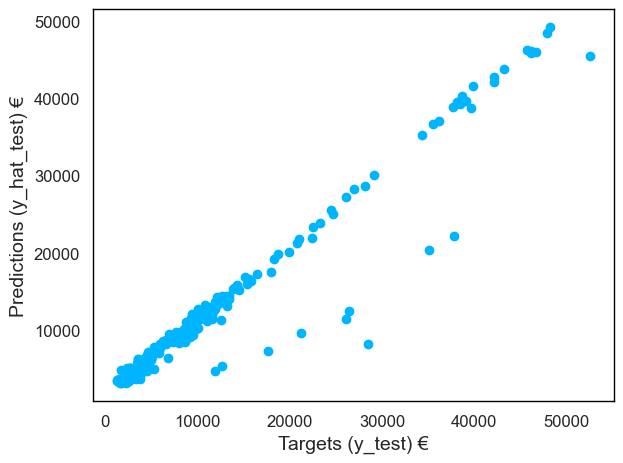

In [167]:
# Plot scatter
plt.scatter(y_test, y_hat_test, color = colors[4])

# Set label parameters
plt.xlabel('Targets (y_test) €',size=14)
plt.ylabel('Predictions (y_hat_test) €',size=14)

# Set tick parameters
plt.tick_params(axis='x', labelsize = 12)
plt.tick_params(axis='y', labelsize = 12)

# Customizations for background and border
ax = plt.gca()
ax.set_facecolor('white')  # Set the background to white
for spine in ax.spines.values():
    spine.set_linewidth(1)  # Set border width to 1
    spine.set_edgecolor('black')

# Set layout and display
plt.tight_layout()
plt.savefig("mode_test.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
print(f"RMSE: {lasso_rmse}")

RMSE: 3246.914852762451


In [44]:
# Store model with best param settings
selected_model = grid_lasso.best_estimator_

In [45]:
import pickle

# Export model
pickle.dump(selected_model, open("model.pkl", 'wb'))

In [46]:
# Extract model feature names
poly = selected_model .named_steps['poly']
feature_names = poly.get_feature_names_out(numerical_features)

In [47]:
# Extract parameter weights from the model 
lasso = selected_model.named_steps['lasso']
coefficients = lasso.coef_

In [48]:
# Store feature names and coefficients in dataframe
lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
lasso_coef_df = lasso_coef_df.sort_values(by="Coefficient", ascending=False).reset_index(drop=True)

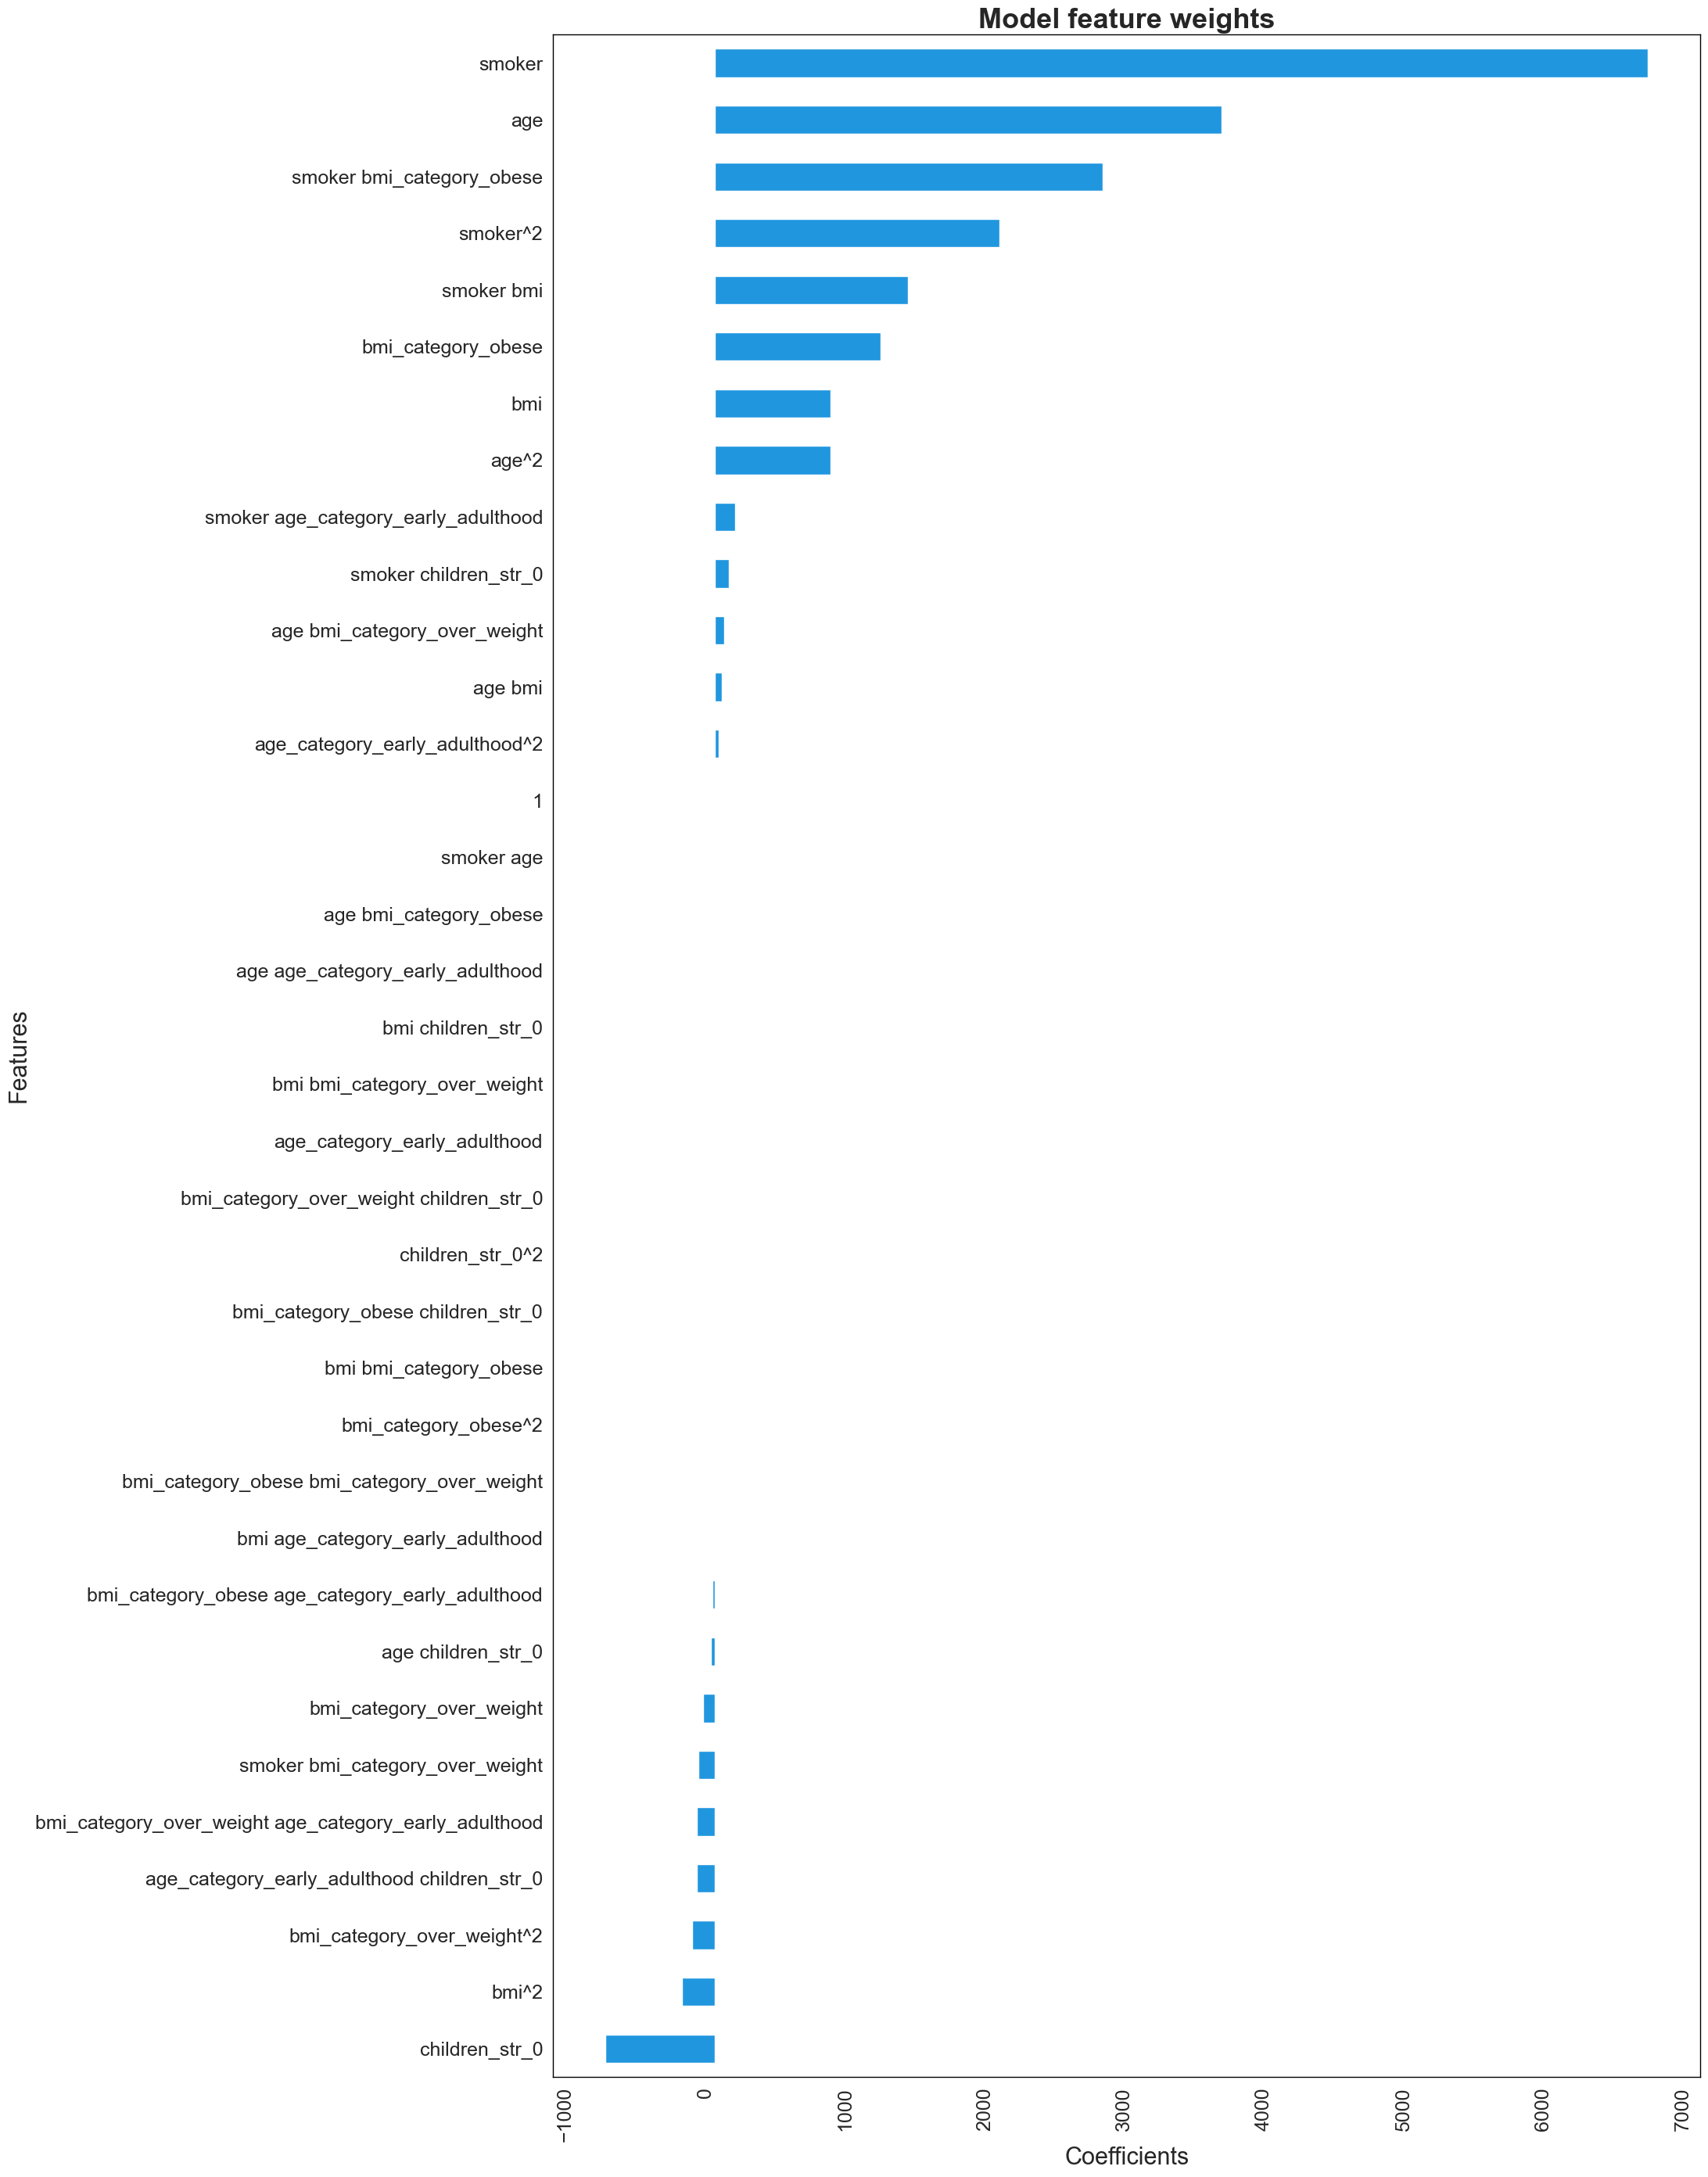

In [49]:
# Plot diverging bar plot 
plt.figure(figsize=(22,28))
sns.barplot(lasso_coef_df, x = 'Coefficient', y = 'Feature', width= 0.5, color= colors[3])
plt.title("Model feature weights", fontsize = 26, weight = "bold")
plt.xticks(rotation = 90, ha = 'right', fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel("Coefficients", fontsize = 22)
plt.ylabel("Features", fontsize = 22)

# Customizations for background and border
ax = plt.gca()
ax.set_facecolor('white')  # Set the background to white
for spine in ax.spines.values():
    spine.set_linewidth(1)  # Set border width to 1
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

## Supplementary models tested

### Linear SVR

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVR

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=X['smoker']
)

# Define categorical and numerical features
numerical_features = ['smoker', 'age', 	'bmi', 
                    'bmi_category_obese', 'bmi_category_over_weight',
                    'age_category_early_adulthood',
                    'children_str_0',]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

# Pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('lsvr', LinearSVR())
])

# GridSearchCV
params = {'lsvr__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
              'lsvr__epsilon': np.arange(0.0, 15),
              'lsvr__random_state' : np.arange(35, 50),
             }

grid_svr = GridSearchCV(model_pipeline, param_grid=params, cv=5, error_score='raise')
grid_svr.fit(x_train, y_train)

# Best parameters and score
print("Best Params:", grid_svr.best_params_)
print("Best Score:", grid_svr.best_score_)

/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Best Params: {'lsvr__epsilon': np.float64(0.0), 'lsvr__loss': 'squared_epsilon_insensitive', 'lsvr__random_state': np.int64(37)}
Best Score: 0.8491288456930025


/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

In [66]:
# Test Linear SVR Model
lsvr_prediction_score = grid_svr.score(x_test, y_test)
lsvr_prediction_score

0.9266549346576858

In [67]:
# Predict y_test with model
lsvr_yhat = grid_svr.predict(x_test)

In [68]:
# Calculate RMSE for LSVR model
lsvr_rmse = np.sqrt(mean_squared_error(y_test, lsvr_yhat ))
print(f"RMSE: {lsvr_rmse}")

RMSE: 3260.1929839949485


### Linear Regression

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=X['smoker']
)

# Define categorical and numerical features
numerical_features = ['smoker', 'age', 	'bmi',
                    'bmi_category_obese', 'bmi_category_over_weight',
                    'age_category_early_adulthood',	
                    'children_str_0',]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

# Pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
])

# GridSearchCV

params = {'lr__fit_intercept' : [True]}

grid_lr = GridSearchCV(model_pipeline, param_grid=params, cv=5, error_score='raise')
grid_lr.fit(x_train, y_train)

# Best parameters and score
print("Best Params:", grid_lr.best_params_)
print("Best Score:", grid_lr.best_score_)

Best Params: {'lr__fit_intercept': True}
Best Score: 0.8490763231502658


In [69]:
# Test Linear Regression Model
lr_prediction_score = grid_lr.score(x_test, y_test)
lr_prediction_score

0.9266593214087172

In [57]:
# Predict y_test with model
l_yhat = grid_lr.predict(x_test)

In [70]:
# Calculate RMSE for Linear model
l_rmse = np.sqrt(mean_squared_error(y_test, l_yhat))
print(f"RMSE: {l_rmse}")

RMSE: 3260.095486851008


### ElasticNet

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=X['smoker']
)

# Define categorical and numerical features
numerical_features = ['smoker', 'age', 	'bmi',
                    'bmi_category_obese', 'bmi_category_over_weight',
                    'age_category_early_adulthood',	
                    'children_str_0',]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

# Pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('en', ElasticNet())
])

# GridSearchCV

params = {'en__fit_intercept' : [True],
          'en__selection' : ['cyclic', 'random'],
          'en__alpha' : [1, 2, 3]}

grid_en = GridSearchCV(model_pipeline, param_grid=params, cv=5, error_score='raise')
grid_en.fit(x_train, y_train)

# Best parameters and score
print("Best Params:", grid_en.best_params_)
print("Best Score:", grid_en.best_score_)

Best Params: {'en__alpha': 1, 'en__fit_intercept': True, 'en__selection': 'random'}
Best Score: 0.8223833450564424


In [71]:
# Test ElasticNet model
en_predicton_score = grid_en.score(x_test, y_test)
en_predicton_score

0.8942992314378113

In [61]:
# Predict y_test with model
en_yhat = grid_en.predict(x_test)

In [72]:
# Calculate RMSE for ElasticNet model
en_rmse = np.sqrt(mean_squared_error(y_test, en_yhat))
print(f"RMSE: {en_rmse}")

RMSE: 3913.7846998743225


## Comparing metrics (Validation score, Prediction Score (R2), and RMSE)
### Justifying choice of Model 

In [101]:
model_names = ["Lasso", "Linear SVR", "Linear Regression","ElasticNet"]
all_validation_score = [grid_lasso.best_score_, grid_svr.best_score_, grid_lr.best_score_, grid_en.best_score_]
all_prediction_score = [lasso_prediction_score, lsvr_prediction_score, lr_prediction_score, en_predicton_score]
all_rmse_score = [lasso_rmse, lsvr_rmse, l_rmse, en_rmse]

model_data_table = pd.DataFrame({'Models Tested': model_names,
                                'Validation scores': all_validation_score,
                                'Prediction scores': all_prediction_score,
                                'RMSE' : all_rmse_score
                                })

model_data_table = model_data_table.reset_index()
model_data_table.index = model_data_table.index + 1
model_data_table = model_data_table.iloc[ : , 1 : ].apply(lambda x: round(x, 4))
model_data_table

,Models Tested,Validation scores,Prediction scores,RMSE
1,Lasso,0.8509,0.9273,3246.9149
2,Linear SVR,0.8491,0.9267,3260.1930
3,Linear Regression,0.8491,0.9267,3260.0955
4,ElasticNet,0.8224,0.8943,3913.7847


/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_36737/3237199079.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()  # Add legend to each subplot


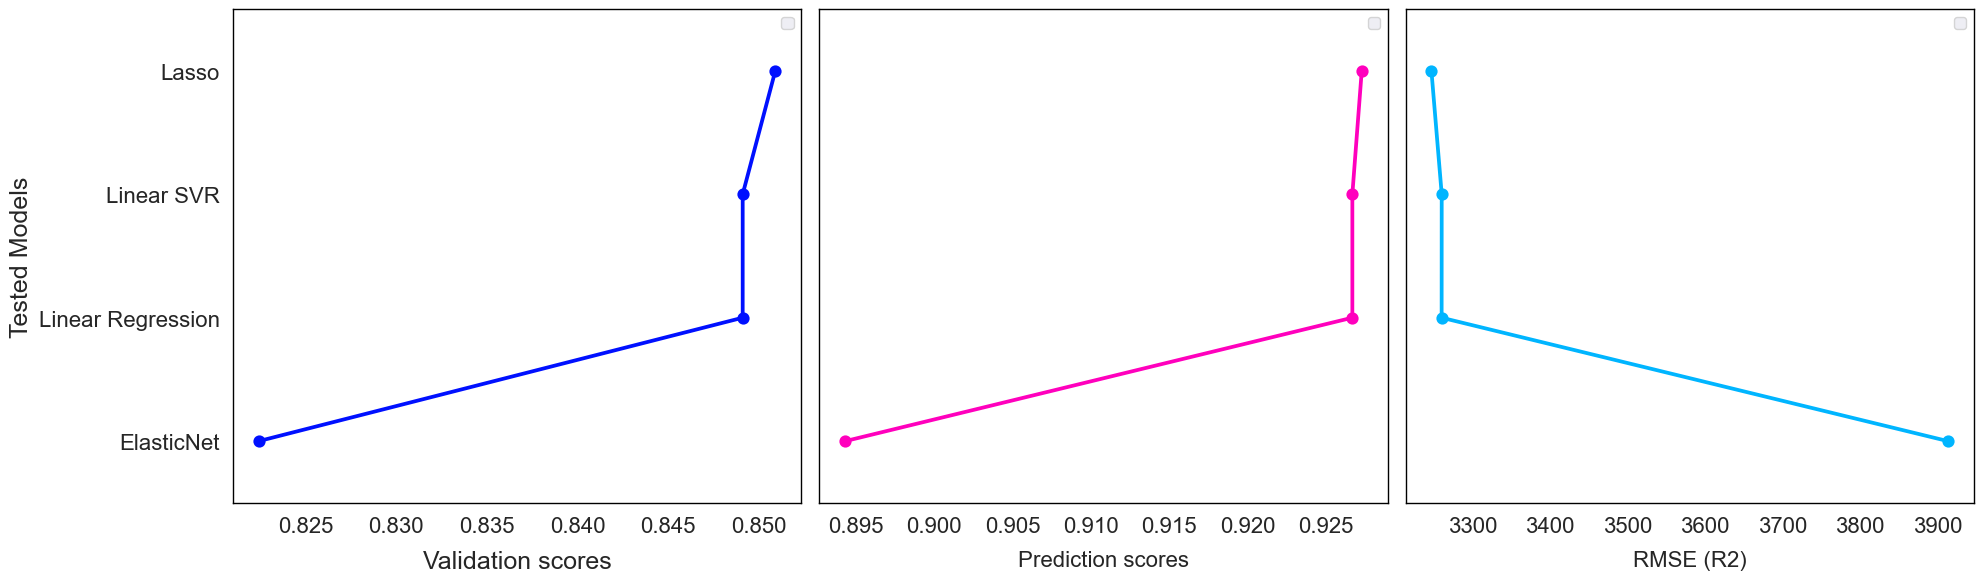

In [162]:
# Compare model performances
sns.set_theme()

fig, axes  = plt.subplots(1, 3, figsize = (20, 6), sharey=True)

sns.pointplot(data=model_data_table, x="Validation scores", y="Models Tested", ax=axes[0], color= colors[5])
axes[0].set_xlabel('Validation scores', fontsize=18, weight='normal')
axes[0].set_ylabel('Tested Models', fontsize=18, weight='normal')
axes[0].tick_params(axis='x', labelsize=16)  # Set x-axis tick label size
axes[0].tick_params(axis='y', labelsize=16)  # Set y-axis tick label size

sns.pointplot(data=model_data_table, x="Prediction scores", y="Models Tested", ax=axes[1], color= colors[7])
axes[1].set_xlabel('Prediction scores', fontsize=16, weight='normal')
axes[1].tick_params(axis='x', labelsize=16)  # Set x-axis tick label size
axes[1].tick_params(axis='y', labelsize=16)  # Set y-axis tick label size

sns.pointplot(data=model_data_table, x="RMSE", y="Models Tested", ax=axes[2], color= colors[4])
axes[2].set_xlabel('RMSE (R2)', fontsize=16, weight='normal')
axes[2].tick_params(axis='x', labelsize=16)  # Set x-axis tick label size
axes[2].tick_params(axis='y', labelsize=16)  # Set y-axis tick label size

# Customization for all subplots
for ax in axes:  # Loop through all subplot axes
    ax.set_facecolor('white')  # Set the background to white
    ax.xaxis.labelpad = 10
    for spine in ax.spines.values():  # Customize borders
        spine.set_linewidth(1)  # Set border width to 1
        spine.set_edgecolor('black')  # Set border color to black
    ax.legend()  # Add legend to each subplot

plt.tight_layout()
# plt.savefig("lasso.png", dpi= 300, bbox_inches = 'tight')
plt.show()